# Assignment 3 - Supervised Learning

## *Joseph Littell*
Netid:  *JPL51*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**


**(a)**

$H(x) = P(Y = 1 | X)$ =

$1 - P(Y = 0 | X)$ =

$\sigma$(W$^T$X)

where  $\sigma$(W$^T$X)

$\frac{1}{(1e^{-WTX})}$


    
**(b)**

$J(x)$ = $-\frac{1}{N}$[-y$^T$log($\hat{y}$) - (1-y)log(1-$\hat{y}$)] 

where $\hat{y} = \sigma(z)$ and $z = W^TX$



**(c)**

$\frac{\delta}{\delta W}C(W)$ = $\frac{\delta}{\delta W}$ - $\frac{1}{N}$[-y$^T$log($\hat{y}$) - (1-y)log(1-$\hat{y}$)] =

$-\frac{1}{N}$[-y$\frac{\delta}{\delta W}$log($\sigma(z)$) - (1-y)log(1-$\sigma(z)$)] =

$\frac{1}{N}$ $\frac{y\frac{\delta}{\delta W}log(\sigma(Wx)}{\sigma(z)}$ + $\frac{(1-y)\frac{\delta}{\delta W}log(1-\sigma(W^Tx)}{1-\sigma(z)}$ =
                                                                                             
$-\frac{1}{N}$ $\frac{(y\sigma(w^Tx))(1-\sigma(W^Tx)\frac{\delta}{\delta W}}{\sigma(z)}$ + $\frac{(1-y)\sigma(W^Tx)log(1-\sigma(W^Tx)\frac{\delta}{\delta W}}{1-\sigma(z)}$ =

$-\frac{1}{N}$[((y)$(\sigma(z))(x)) - ((1-y)(\sigma(z))$(x))] =
                                                                                                            
$-\frac{1}{N}$[y-y$\sigma(z) - \sigma(z) + y\sigma(z)$]x =
                                                                                                        
$-\frac{1}{N}$[y-$\sigma(z)$]x - $\frac{\delta}{\delta W}$ =
                                                                                                            
$-\frac{1}{N}(\hat{y}-y)x$
                                                                                                            
where $\hat{y} = \sigma(z)$  and $z = w^Tx$
                                                                                                            
Therefore the partial derivitives are as follows;
                                                                                                                       
w =$ \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$ =
                                                                                                            
-[$\frac{1}{N}(\sigma(w_0x_0)-y)x_0$, $\frac{1}{N}(\sigma(w_1x_1)-y)x_1$, $\frac{1}{N}(\sigma(w_2x_2)-y)x_2$]

                                                                                                                       
                                                                                                                       
**(d)**
                                                                                                                       
$W = W + n(w)$




Part E:


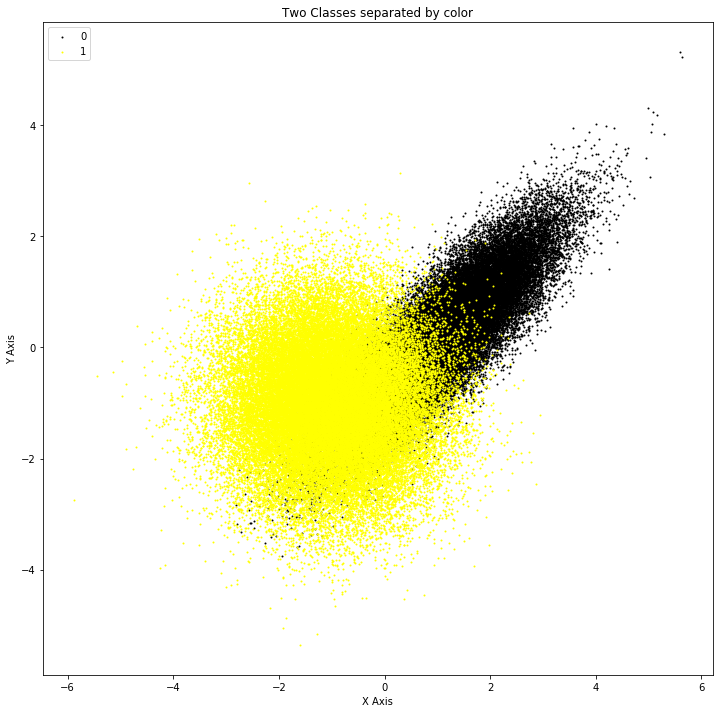


The data seems seperatable into two classes, however there is some overlap near the origin (0, 0).

Due to the classes, Logistic Regression would be appropriate because the dependent variable is dichotomous.
However, due to the overlap, some transformations may need to occur to better separate the data prior to any predictions
can be made.


Part F:

There does not appear to be any missing data or scalar differences in the data set. If there was, transformations specificly
made to remedy the situation would have to be made, ie Log transformations and the like.



In [60]:
# Libraries to import for use
import pandas as pd                                 # For dataframes
import numpy as np                                  # For Linear Algebra
from numpy import genfromtxt                        # to convert the data
import matplotlib.pyplot as plt                     # for plotting
from sklearn.model_selection import StratifiedKFold # for Cross Validation
from sklearn.metrics import roc_curve               # to plot ROC Curves
from sklearn.metrics import precision_recall_curve  # for PR Curves
import sklearn.metrics as metrics                   # For AUC
from sklearn.metrics import auc                     # For AUC

##########
# Part E #
##########

# load the dataset
data = genfromtxt("./A3_Q1_data.csv",delimiter=",") # Read in the dataset and seperate the variables by ','
cdict = {0:'black',1:'yellow'}                      # a place holder dictionary to hold the color and legend for the plot

print("\n\nPart E:")

plt.figure(figsize = (12, 12))                      # Determine the size of the plot

for g in np.unique([0,1]):
    ix = np.where(g == data[:,2])
    plt.scatter(data[ix,0],                         # Seperate the data into each X and Y
                data[ix,1],                         # from there determine the class
                c = cdict[g],                       # The color corresponds that classes' dic
                label = g,                          # label the class based on the dictionary
                s = 1)
    plt.xlabel("X Axis")                            # X Label
    plt.ylabel("Y Axis")                            # Y Label
    plt.title("Two Classes separated by color")     # Plot title
    plt.figure.facecolor = 1
plt.legend()                                        # Plot the tegend
plt.show()                                          # Print the plot

print('\nThe data seems seperatable into two classes, however there is some overlap near the origin (0, 0).')
print('\nDue to the classes, Logistic Regression would be appropriate because the dependent variable is dichotomous.')
print('However, due to the overlap, some transformations may need to occur to better separate the data prior to any predictions')
print('can be made.')
print('')

##########
# Part F #
##########

print("\nPart F:")
print('\nThere does not appear to be any missing data or scalar differences in the data set. If there was, transformations specificly')
print('made to remedy the situation would have to be made, ie Log transformations and the like.')
print('')

In [48]:
##########
# Part G #
##########

# Converts X to a normalize function based on X's mean and standard deviation
def normalizeAndIntercepts(x):
    x_ = (x - x.mean(axis=0)) / x.std(axis=0)
    return np.concatenate( ( np.tile(np.matrix("1") ,(x.shape[0],1) ),x_) , 1 )

##############
# Part H - J #
##############

# A class to hold all of the functions required to make a Logisitic Regression work
class LogisticRegression(object):
    def __init__(self, weights,learningRate=0.05,earlyStopping=10^-6):
        self.outputLayerSize = 1
        self.inputLayerSize = 2
        self.learningRate = learningRate
        self.eS = earlyStopping
        self.W = weights

# utlizing the sigmoid function for predictions
    def predict(self,X):
        self.z1 = np.dot(X,self.W)
        return self.sigmoid(self.z1)

# This is the logistic 
    def sigmoid(self,z):
        return np.exp(z)/(1+np.exp(z))
    
# Creates a cost function based on the loss between Y and the predicted Y
    def costFunction(self,X,y):
        yHat = self.predict(X)
        N = X.shape[0]
        cost = - np.dot(y.T , np.log(yHat)) - np.dot( (1-y).T ,np.log((1-yHat)) )
        return cost / N

# define the rate at which
    def gradient(self,X,y):        
        yHat = self.predict(X)
        N = X.shape[0]
        gradient = -(1/N)*( np.dot( X.T,(yHat-y)) )
        return gradient
    
# Runs the Gradient descent and Cost functions on the training data in order to determine cost per epoch
    def train(self,X,y,epochs = 10,lr = 0.01, xTest = None, yTest = None):
        self.learningRate = lr
        costs = []
        test_costs = []
        for i in range(epochs):        
            cost1 = self.costFunction(X,y) # Calculating cost function
            costs.append([i,float(cost1)])
            
            try:
                test_cost = self.costFunction(xTest,yTest)
                test_costs.append([i,float(test_cost)])
            except TypeError: pass
            currentW = self.W
            gradient = self.gradient(X,y)
            self.W += np.multiply( gradient, self.learningRate)
            # If the difference in the old weight and the current weight is less than 10^-6 then stop the descent
            if np.linalg.norm(self.W, ord=2) - np.linalg.norm(currentW, ord=2) < self.eS:
                break
        return costs, test_costs
 
 # Plots the rates of each of the cost per epoch at each of the pre defined learning rates
def plotCosts(costs1, costs2, costs3):
    costs1 = np.array(costs1)             # Convert the cost given in fit to a np array.   
    costs2 = np.array(costs2)             # Convert the cost given in fit to a np array.
    costs3 = np.array(costs3)             # Convert the cost given in fit to a np array.
    plt.figure(figsize=(12, 12))          # defines the plot size
    plt.title("Cost over Epochs where Learning Rate")
    plt.plot(costs1[:,0], costs1[:,1], c='b',label="Training Cost at rate 0.01")
    plt.plot(costs2[:,0], costs2[:,1], c='r',label="Training Cost at rate 0.1")
    plt.plot(costs3[:,0], costs3[:,1], c='g',label="Training Cost at rate 1")
    plt.xlabel("Epochs")                  # X Axis Label
    plt.ylabel("Cost")                    # Y Axis Label
    plt.legend(loc='upper right')         # Places the legend in the upper right of the plot
    plt.show()                            # 
    pass

# Creates a 
def random_weights():
    weights = np.random.rand(3,1)
    return weights


Part K:



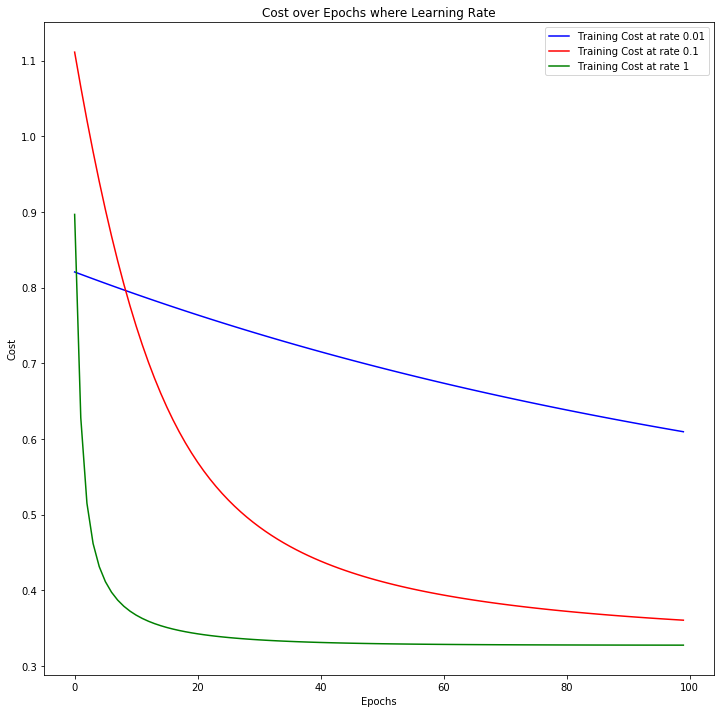


The learning rate determines the rate at which the gradient descent decreases. The cost reduces as the learning rate increases
As such, I will choose a training rate of 0.1 for the remainder of the problem. As a higher rate will fluctuate too much, and a
lower rate will take a substantially longer time to reach the minimum.


In [49]:
# Loading the data
data = genfromtxt("./A3_Q1_data.csv",delimiter=",",skip_header=1)
y = data[:,2:]
x = data[:,:2]

idxs = np.arange(len(data))
np.random.shuffle(idxs)
x = x[idxs]
y = y[idxs]

# (i) dividing data into training and test set, where training is 70% and test is 30%
x_train = x[:70000,:]
y_train = y[:70000,:]
x_train = normalizeAndIntercepts(x_train)

x_test = x[70000:,:]
y_test = y[70000:,:]
x_test = normalizeAndIntercepts(x_test)

##########
# Part K #
##########

# Train and plot models at three different Learning rates.

print("\nPart K:\n")

# Learning rate = 0.01
weights = random_weights()
model = LogisticRegression(weights)
costs1_, test_costs1_ = model.train(x_train, y_train, epochs = 100, lr = 0.01, xTest = x_test, yTest = y_test)

# Learning rate = 0.1
weights = random_weights()
model = LogisticRegression(weights)
costs2_, test_costs2_ = model.train(x_train, y_train, epochs = 100, lr = 0.1, xTest = x_test, yTest = y_test)

# Learning rate = 1
weights = random_weights()
model = LogisticRegression(weights)
costs3_, test_costs3_ = model.train(x_train, y_train, epochs = 100, lr = 1, xTest = x_test, yTest = y_test)

# Plot the costs
plotCosts(costs1_, costs2_, costs3_)

print("\nThe learning rate determines the rate at which the gradient descent decreases. The cost reduces as the learning rate increases")
print("As such, I will choose a training rate of 0.1 for the remainder of the problem. As a higher rate will fluctuate too much, and a")
print("lower rate will take a substantially longer time to reach the minimum.")


Part L:



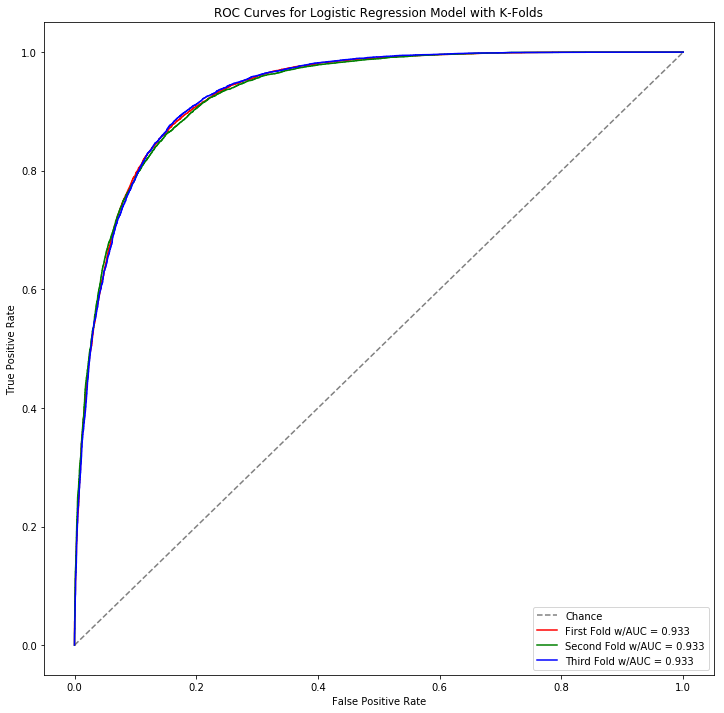


Part M:

We use crossvalidation to assess our model without using the testing data. By slicing off a part of the training data
we avoid any contamination with the test set, while also generalizing the model. This helps us to predict cost on an
independent dataset.


In [53]:
##########
# Part L #
##########

print("\nPart L:\n")

# Create arrays to hold the data
X_ = []; 
Y_ = []; 
Yhat_ = [];

# separate the data into 3 validation sets
skf = StratifiedKFold(n_splits=3)

for train_index, test_index in skf.split(x_train, y_train):
    x_train_, x_test_ = x_train[train_index], x_train[test_index]    
    y_train_, y_test_ = y_train[train_index], y_train[test_index]

    # Initieate a randome weight
    weights = np.random.rand(3,1)
    # Use those weights to initiate the model
    model = LogisticRegression(weights)
    # Train the model of the training set. Still utilizing the Learning rate of 0.1
    model.train(x_train_, y_train_, epochs = 500, lr = 0.1)
    # Use the model to make predictions of the test set
    Yhat_.append(model.predict(x_test_))
    # Add those scores the to array
    X_.append(x_train_)
    Y_.append(y_test_)
    pass

# Calculate the ROCs from each of the three folds
fpr1, tpr1, thresholds1 = roc_curve(Y_[0],Yhat_[0], pos_label=1)  # ROC for Fold 1
fpr2, tpr2, thresholds2 = roc_curve(Y_[1],Yhat_[1], pos_label=1)  # ROC for Fold 2
fpr3, tpr3, thresholds3 = roc_curve(Y_[2],Yhat_[2], pos_label=1)  # ROC for Fold 3

# Calculate the Area under the curve for each fold
auc1 = metrics.roc_auc_score(Y_[0],Yhat_[0])                      # AUC for Fold 1
auc2 = metrics.roc_auc_score(Y_[1],Yhat_[1])                      # AUC for Fold 2
auc3 = metrics.roc_auc_score(Y_[2],Yhat_[2])                      # AUC for Fold 3

# define the size of the plot
plt.figure(figsize=(12, 12))

# Print a chance line
plt.plot([0,1],[0,1],'--', color='gray', label = 'Chance')

# Print the AUC for each Fold
legend_string1 = 'AUC = {:0.3f}'.format(auc1)                     # String to print AUC 1
legend_string2 = 'AUC = {:0.3f}'.format(auc2)                     # String to print AUC 2
legend_string3 = 'AUC = {:0.3f}'.format(auc3)                     # String to print AUC 3

# plot each Fold
plt.plot(fpr1, tpr1, c='r', label='First Fold w/' + legend_string1)
plt.plot(fpr2, tpr2, c='g', label='Second Fold w/' +legend_string2)
plt.plot(fpr3, tpr3, c='b', label='Third Fold w/' + legend_string3)

#plot titles and labels
plt.title("ROC Curves for Logistic Regression Model with K-Folds")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

##########
# Part M #
##########

print("\nPart M:\n")
print("We use crossvalidation to assess our model without using the testing data. By slicing off a part of the training data")
print("we avoid any contamination with the test set, while also generalizing the model. This helps us to predict cost on an")
print("independent dataset.")


Part N:



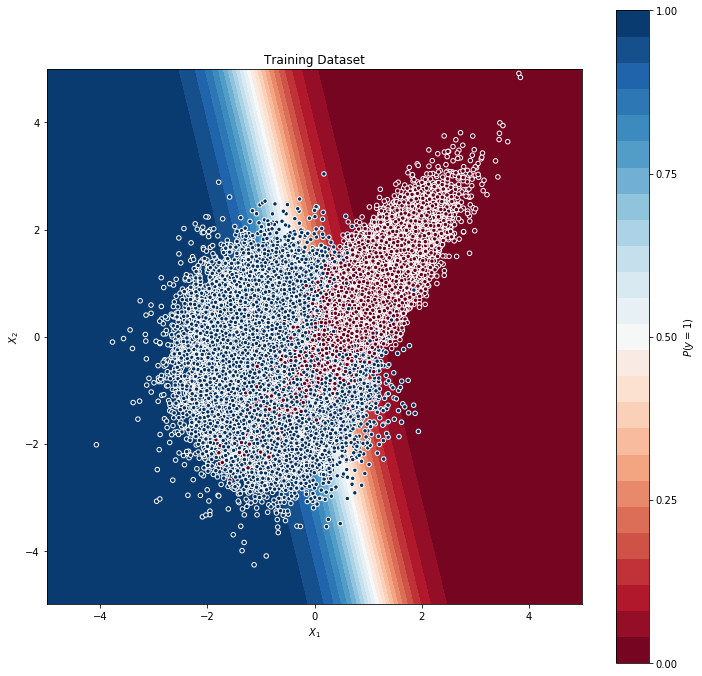

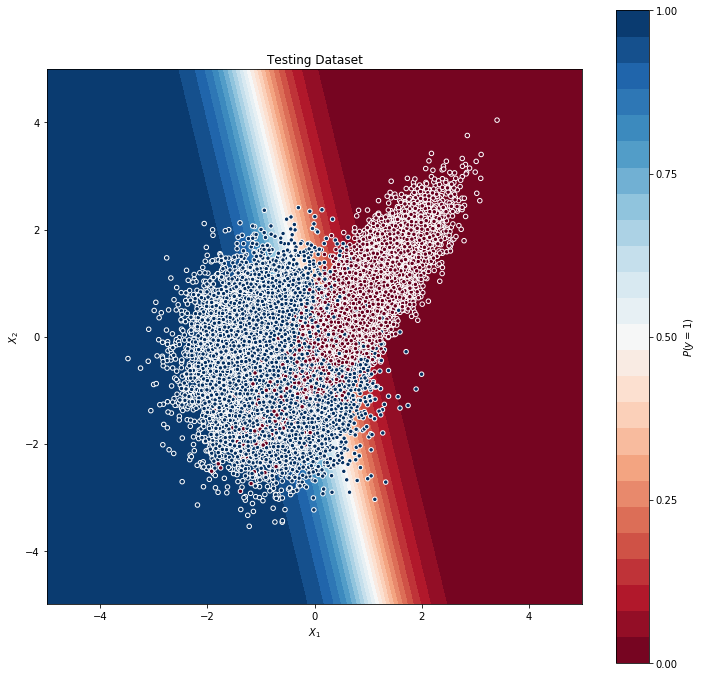


Part O:



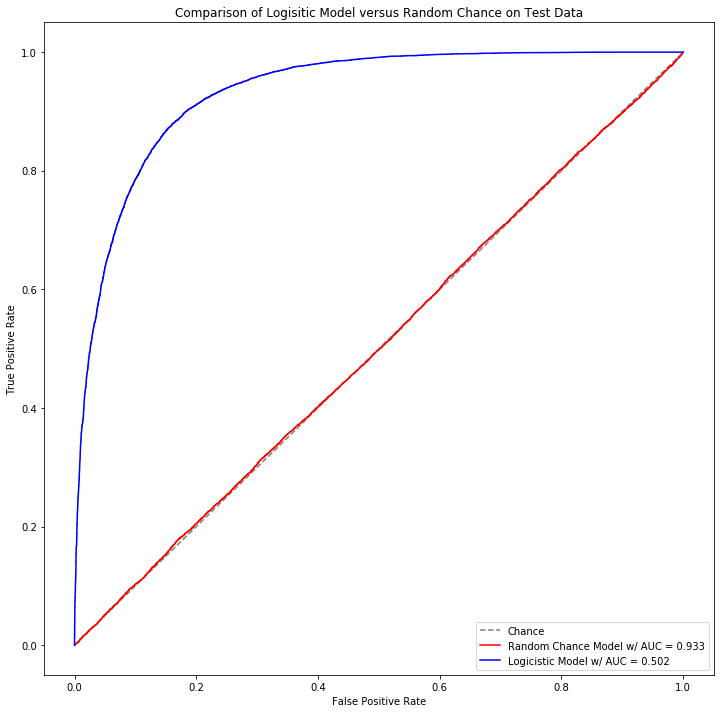

The Logistic model has an AUC of 0.933 and the Random Chance model has an AUC of 0.502.
This is a difference of 0.431, meaning that the logistic mode well outperformed the random chance model


In [69]:
##########
# Part N #
##########

print("\nPart N:\n")

#initiation of the boundrylines
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
ones = np.ones_like(xx).reshape(-1,1)
grid = np.c_[ones.ravel().reshape(-1,1), xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)]
probs = model.predict(grid).reshape(xx.shape[0],xx.shape[1])

# Plot for Testing data
f, ax = plt.subplots(figsize = (12, 12))                               # Setting the size of the plot
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(np.array(x_train[:,1]), np.array(x_train[:,2]), c = np.array(y_train), cmap="RdBu", s = 20, edgecolor='white' )
ax.set_title('Training Dataset')
ax = ax.set(aspect="equal", xlim=(-5, 5), ylim = (-5, 5), xlabel = "$X_1$", ylabel = "$X_2$") 

# Plot for training data
f, ax = plt.subplots(figsize=(12, 12))                                  # Setting the size of the plot
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(np.array(x_test[:,1]),np.array(x_test[:,2]),c=np.array(y_test), cmap="RdBu",s=20,edgecolor='white' )
ax.set_title('Testing Dataset')
ax = ax.set(aspect="equal", xlim=(-5, 5), ylim=(-5, 5), xlabel="$X_1$", ylabel="$X_2$")

plt.show()

print('\nThe boundry line is linear, which given the intermixing of the two classes near the origin leaves our classification')
print('with something to be desired. The only way I could see improving the boundry would be ')

##########
# Part 0 #
##########

print("\nPart O:\n")

# Logisitc Model
y_model = model.predict(x_test)                                     # train the Model
fp, tp, thresh  = (roc_curve(y_test,y_model, pos_label=1))          # Calculate the ROC
auc_model = auc(fp,tp)                                              # Calculate the AUC of the Model

# Random Model
y_random = np.random.rand(y_test.shape[0],1)                        # Train the model
fpr, tpr, threshr  = (roc_curve(y_test,y_random, pos_label=1))      # Calculate ROC
auc_random = auc(fpr,tpr)                                           # Calculate the AUC of the Model

# ROC Curves

# Print the AUC for each model
legend_string1 = 'AUC = {:0.3f}'.format(auc_model)                  # String to print AUC
legend_string2 = 'AUC = {:0.3f}'.format(auc_random)                 # String to print AUC

plt.figure(figsize=(12, 12))                                        # determine the size of the plot

# Print a chance line
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')

plt.plot(fpr,tpr,c= 'r', label = "Random Chance Model w/ " + legend_string1)
plt.plot(fp,tp,c= 'b', label = "Logicistic Model w/ " + legend_string2)
plt.legend(loc = 'lower right')                                     # Legend location
plt.title("Comparison of Logisitic Model versus Random Chance on Test Data")
plt.xlabel("False Positive Rate")                                   # X Axis
plt.ylabel("True Positive Rate")                                    # Y Axis
plt.show()                                                          # Plot the Graphs

aucdiff = auc_model - auc_random

print("The Logistic model has an AUC of {:.3f} and the Random Chance model has an AUC of {:.3f}.".format(auc_model, auc_random))
print("This is a difference of {:.3f}, meaning that the logistic mode well outperformed the random chance model".format(aucdiff))



## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**


Part B:



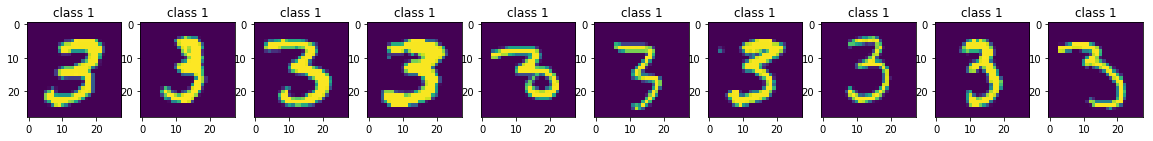

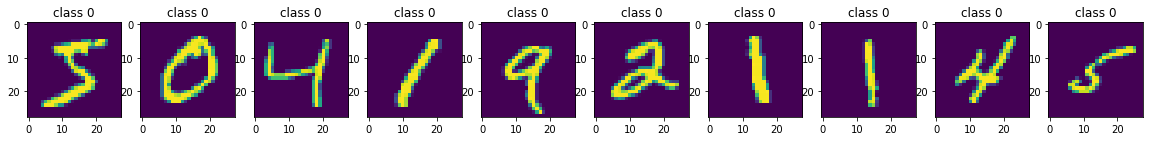


Part C:

There are 53869 present in class 0.
There are 6131 present in class 1.

This is highly unbalances classes. For models that are random guess, the model would preform very poorly because it
would expect the data set to be equally likely.


In [131]:
import numpy as np                                       # for linear algebra
import matplotlib.pyplot as plt                          # For plotting
from sklearn.model_selection import train_test_split     # to separate the data into testing/validations sets
from sklearn.linear_model import LogisticRegression      # for the Logistic Regression model
from sklearn.metrics import roc_curve                    # for plotting ROC Curves
from sklearn.metrics import precision_recall_curve       # for plotting Precistion and Recall curves
from sklearn.metrics import f1_score                     # for determining F1 score
from sklearn.metrics import auc                          # for determining area under the curve
import mnist                                             # load the MNIST data

##########
# Part A #
##########

# Load the training images and labels
train_images = mnist.train_images()
train_labels = mnist.train_labels()

# Load the testing images and labels
test_images = mnist.test_images()
test_labels = mnist.test_labels()

#convert data objects into numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Reshape each image array to 28*28
train_images = train_images.reshape(60000,28,28)
test_images = test_images.reshape(10000,28,28)

# Convert label binary where 3s are 1s and the rest are 0s
train_labels = np.where(train_labels == 3, 1, 0)
test_labels = np.where(test_labels == 3, 1, 0)

##########
# Part B #
##########   

print("\nPart B:\n")

train_image_1 = train_images[train_labels == 1][0:10]
train_image_0 = train_images[train_labels == 0][0:10]

fig1, axes1 = plt.subplots(1,10, figsize=(20,10))
fig2, axes2 = plt.subplots(1,10, figsize=(20,10))

# Class One Examples
for i in range(10):
    axes1[i].set_title('class {}'.format(1))
    axes1[i].imshow(train_image_1[i])

# Class Zero Examples
for i in range(10):
    axes2[i].set_title('class {}'.format(0))
    axes2[i].imshow(train_image_0[i])
    
plt.show()

##########
# Part C #
##########

unique, counts = np.unique(train_labels, return_counts = True)
print("\nPart C:\n")
print("There are {} present in class 0.".format(counts[0]))
print("There are {} present in class 1.".format(counts[1]))
print("\nThis is highly unbalances classes. For models that are random guess, the model would preform very poorly because it")
print("would expect the data set to be equally likely.")


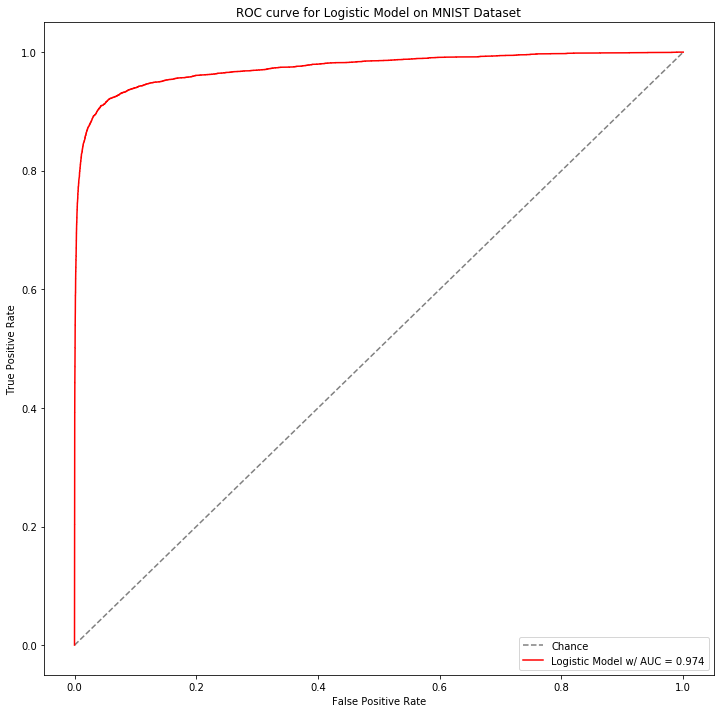

In [109]:
##########
# Part D #
##########

# Create an array to hold the predictions scores for the ROC Curve
prediction_scores = np.empty(train_label_new.shape[0], dtype='object')

#resize the training images for fit
train_images_2D = train_images.reshape(60000,-1)

# Conduct K Folds Cross Validations with K = to 3
skf = StratifiedKFold(n_splits = 3, shuffle = True)

# X has to have rows - observation, columns - variables, y - 1D
for train_index, val_index in skf.split(train_images_2D, train_labels):
    x_train, x_val = train_images_2D[train_index], train_images_2D[val_index]
    y_train = train_labels[train_index]
    
    # Initiate the model
    model = LogisticRegression(random_state = 323, solver='lbfgs', max_iter=200)
    # Train the model
    model = model.fit(x_train, y_train)
        
    # Test the classifier on the validation data for this fold
    cpred = model.predict_proba(x_val)
        
    # Save the predictions for this fold
    prediction_scores[val_index] = cpred[:,1]
    
fp, tp, thresh = metrics.roc_curve(train_label_new, prediction_scores, pos_label=1)    # Calculate the ROC 
auc1 = metrics.roc_auc_score(train_label_new, prediction_scores)                       # Calculate the AUC for the model
legend_string1 = 'AUC = {:0.3f}'.format(auc1)                                          # convert that AUC under

# define the size of the plot
plt.figure(figsize=(12, 12))

# plot the chance line
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')

plt.plot(fp, tp, c='r', label='Logistic Model w/ ' + legend_string1)                   # Plot the model
plt.xlabel('False Positive Rate')                                                      # X Axis
plt.ylabel('True Positive Rate')                                                       # Y Axis
plt.legend(loc='lower right')                                                          # Legend location
plt.title('ROC curve for Logistic Model on MNIST Dataset')                             # Title
plt.show()                                                                             # Plot the Graph

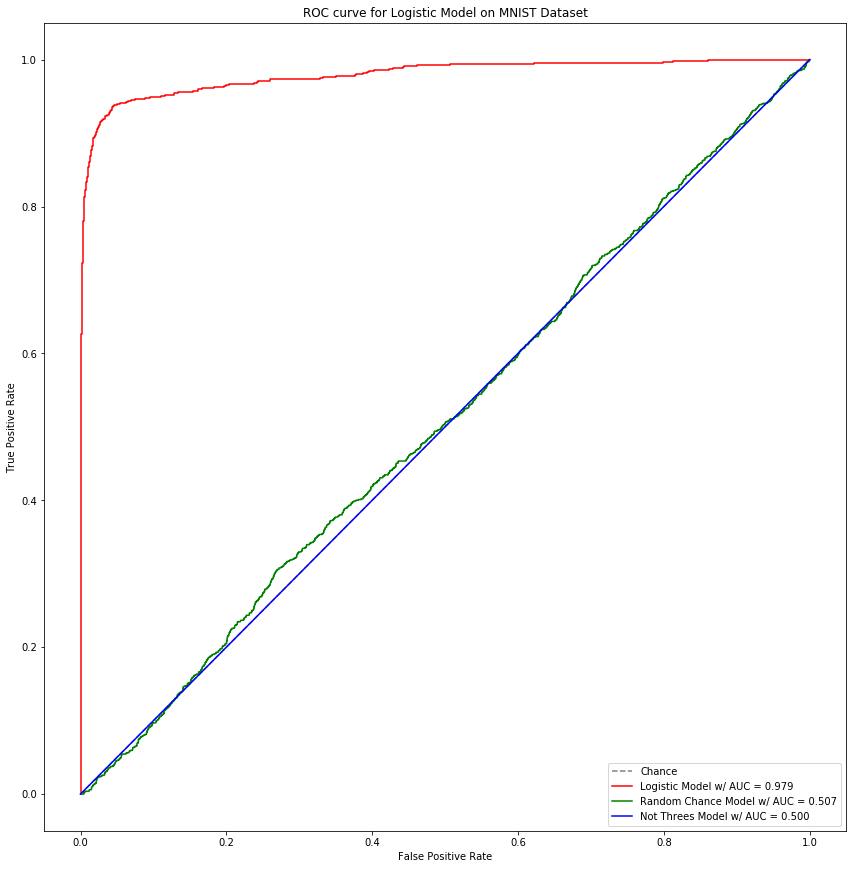

In [121]:
##########
# Part E #
##########

# Logistic Model
test_images_2D = test_images.reshape(10000,-1)                                  # reshape the test array
prediction = model.predict_proba(test_images_2D)[:,1]                           # Make predictions with the model
fp, tp, thresh = metrics.roc_curve(test_labels, prediction, pos_label=1)        # Calculate the ROC 
auc1 = metrics.roc_auc_score(test_label_new, prediction)                        # Calculate the AUC for the model
legend_string1 = 'AUC = {:0.3f}'.format(auc1)                                   # convert that AUC under

# Random Chance Model
y_random = np.random.random(10000)                                              # Chose a random int between 0 and 1
fpr, tpr, thresh = metrics.roc_curve(test_labels, y_random, pos_label=1)        # Calculate the ROC 
auc2 = metrics.roc_auc_score(test_labels, y_random)                             # Calculate the AUC for the model
legend_string2 = 'AUC = {:0.3f}'.format(auc2)                                   # convert that AUC under

# not Threes Model
y_neg = np.zeros(10000)                                                         # All guess are Zero
fp3, tp3, thresh = metrics.roc_curve(test_labels, y_neg, pos_label=1)           # Calculate the ROC 
auc3 = metrics.roc_auc_score(test_labels, y_neg)                                # Calculate the AUC for the model
legend_string3 = 'AUC = {:0.3f}'.format(auc3)                                   # convert that AUC under

# define the size of the plot
plt.figure(figsize=(12, 12))

#plot the chance line
plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
plt.plot(fp, tp, c='r', label='Logistic Model w/ ' + legend_string1)
plt.plot(fpr, tpr, c = 'g', label = 'Random Chance Model w/ ' + legend_string2)
plt.plot(fp3, fp3, c = 'b', label = "Not Threes Model w/ " + legend_string3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.title('ROC curve for Logistic Model on MNIST Dataset')
plt.show()

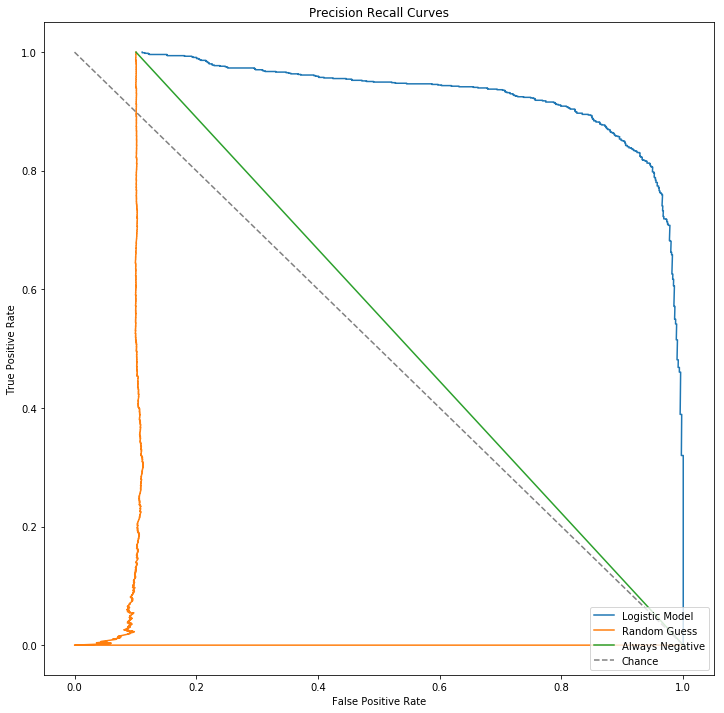

When comparing the models under ROC and PR, we can clearly see that the Logisitic model out performs the two other models
Interestingly enough, although the Not-Threes and Random model peform similar in the ROC, the not Three far outperforms
the random model. This is most likely due to the classes being heavily weighted to the non-Three classification, i.e
there are more zeros than ones.


In [125]:
#Plot PR curves
fprlog, tprlog, _ = metrics.precision_recall_curve(test_labels, prediction, pos_label=1)
legend_string1 = 'Logistic Model'

fprran, tprran, _ = metrics.precision_recall_curve(test_labels, y_random, pos_label=1)
legend_string2 = 'Random Guess'

fprneg, tprneg, _ = metrics.precision_recall_curve(test_labels, y_neg, pos_label=1)
legend_string3 = 'Always Negative'

# define the size of the plot
plt.figure(figsize=(12, 12))

# plot the models
plt.plot(fprlog, tprlog, label=legend_string1)               # Logistic Model
plt.plot(fprran, tprran, label=legend_string2)               # Random Chance Model
plt.plot(fprneg,tprneg,label=legend_string3)                 # not threes model

#plot the chance line
plt.plot([0,1],[1,0],'--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Precision Recall Curves')
plt.show() 

print('When comparing the models under ROC and PR, we can clearly see that the Logisitic model out performs the two other models')
print('Interestingly enough, although the Not-Threes and Random model peform similar in the ROC, the not Three far outperforms')
print('the random model. This is most likely due to the classes being heavily weighted to the non-Three classification, i.e')
print('there are more zeros than ones.')

C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


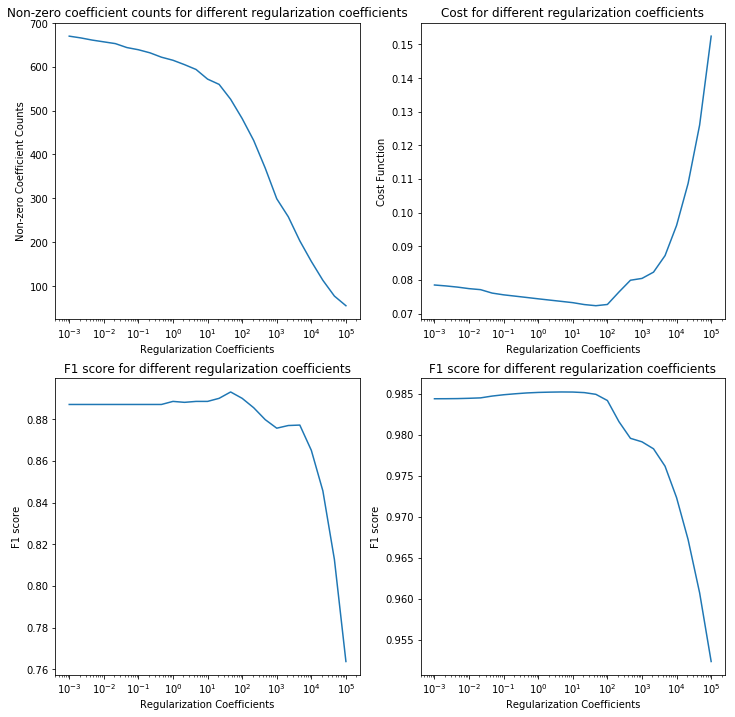

In [129]:
##########
# Part F #
##########

from sklearn.metrics import f1_score, roc_auc_score

def logit_lasso(C, test, label):
    coef_count = []
    cost = []
    f1_binary = []
    auc = []
    cnt = 0
    
    for c in C:
        cnt += 1
        ClassifierPenal = LogisticRegression(penalty='l1', random_state=323, C = c)
        penal = ClassifierPenal.fit(train_images_2D, train_labels)
        pred_label = penal.predict(test)
        pred_proba = penal.predict_proba(test)
        coef_count.append(np.sum(np.isclose(penal.coef_, 0)))
        cost.append(-np.sum(np.log(pred_proba**np.c_[1-label, label]))/label.shape)
        f1_binary.append(f1_score(label, pred_label, pos_label=1))
        auc.append(roc_auc_score(label, pred_proba[:,1]))
    return 28*28-np.array(coef_count), cost, f1_binary, auc

C = np.logspace(3,-5,25)
result_stats = logit_lasso(C, test_images_2D, test_labels)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

names = ["Non-zero Coefficient Counts", "Cost Function", "F1-score", "Aear Under Curve of ROC"]

axes[0][0].plot(C**(-1), result_stats[0],'-')
axes[0][0].set_xscale('log')
axes[0][0].set_title('Non-zero coefficient counts for different regularization coefficients')
axes[0][0].set_xlabel("Regularization Coefficients")
axes[0][0].set_ylabel('Non-zero Coefficient Counts')

axes[0][1].plot(C**(-1), result_stats[1],'-')
axes[0][1].set_xscale('log')
axes[0][1].set_title('Cost for different regularization coefficients')
axes[0][1].set_xlabel("Regularization Coefficients")
axes[0][1].set_ylabel('Cost Function')

axes[1][0].plot(C**(-1), result_stats[2], '-')
axes[1][0].set_xscale('log')
axes[1][0].set_title('F1 score for different regularization coefficients')
axes[1][0].set_xlabel("Regularization Coefficients")
axes[1][0].set_ylabel('F1 score')

axes[1][1].plot(C**(-1),result_stats[3],'-')
axes[1][1].set_xscale('log')
axes[1][1].set_title('F1 score for different regularization coefficients')
axes[1][1].set_xlabel("Regularization Coefficients")
axes[1][1].set_ylabel('F1 score')

plt.show()

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

For this exercise I've chosen the _Kickstater_ dataset from Kaggle. 

Kickstarter is a crowd funding website for a multitude of ventures. Crowd funding is a relatively new venture in which an individual or group asks others to give donations to meet a set goal over a set amount of time. With Kickstarter, in contrast a website like GoFundMe, campaigns typically lead to some form of artisitc venture. This may be organizing a concert, to building a videogames. As such, the campaign can have multiple different different engagement methods. 

This data exploration will look at if we can determine if a campaign will be a success or failure. For this, a success is merely making the monetary goad set but the campaign in the alloted time.

The variables present in the data set are as follows;

1 ID - a specific alpha numeric for each campaign
 
2 name - the name of the project

3 category - the subcategory of the project

4 main category - the main category of the project

5 currency - the type of currency used (US Dollar, CA Dollar, British Pound, Euro, or AUS Dollar)

6 deadline - When the funding campaign ends

7 goal - The set number of dollars in the specified campaign chosen

8 launched - When the campaign launced

9 pledged - h

10 *state* - Whether the project succeed or failed, this is our factor

11 backers - the number of people that backed it

12 Country - the country the campaign is set in

13 usd pledged - how much US Dollars or equivelent is raised

14 usd_pledged_real - how much was raised after Kickstarter's share

15 usd_goal_real - how much the goal is after Kickstarter's share


Prior to begining, having supported campaigns in the past, I'm going to make the assumption that any classifier we will use will not be particularly success because there are a number of other factors, particularly people involved that would be influencal or well known in the category the campaign is running


(b) Download the data and plot the data to describe it.


In [143]:
import numpy as np                                       # for linear algebra
import matplotlib.pyplot as plt                          # For plotting
from sklearn.model_selection import train_test_split     # to separate the data into testing/validations sets
from sklearn.linear_model import LogisticRegression      # for the Logistic Regression model
from sklearn.metrics import roc_curve                    # for plotting ROC Curves
from sklearn.metrics import precision_recall_curve       # for plotting Precistion and Recall curves
from sklearn.metrics import f1_score                     # for determining F1 score
from sklearn.metrics import auc                          # for determining area under the curve
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from datetime import datetime
from sklearn.preprocessing import StandardScaler

kickstarter = pd.read_csv("./ks-projects-201801.csv", encoding='latin1', low_memory=False )

kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


As stated previous, our deciding factor is the "state" of the campaign after it's deadline as been reached.

In [134]:
kickstarter.isnull().sum()/kickstarter.shape[0]

ID                  0.000000
name                0.000011
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd pledged         0.010027
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64

Only a few of our datasets have null values, namely name and US Dollars Pledged. 

In [148]:
data = []
annotations = []

rate_success_cat = kickstarter[kickstarter['state'] == 'successful'].groupby(['main_category']).count()['ID']\
                / kickstarter.groupby(['main_category']).count()['ID'] * 100
rate_failed_cat = kickstarter[kickstarter['state'] == 'failed'].groupby(['main_category']).count()['ID']\
                / kickstarter.groupby(['main_category']).count()['ID'] * 100
    
rate_success_cat = rate_success_cat.sort_values(ascending=False)
rate_failed_cat = rate_failed_cat.sort_values(ascending=True)

print('The rate of success per category is as follows:\n')
print(rate_success_cat)
print('\n\nThe rate of failures per category is as follows:\n')
print(rate_failed_cat)

The rate of success per category is as follows:

main_category
Dance           62.048832
Theater         59.873545
Comics          53.997597
Music           46.606187
Art             40.883742
Film & Video    37.151844
Games           35.531208
Design          35.084802
Publishing      30.847169
Photography     30.661471
Food            24.733761
Fashion         24.513499
Crafts          24.009536
Journalism      21.282860
Technology      19.754982
Name: ID, dtype: float64


The rate of failures per category is as follows:

main_category
Dance           32.776008
Theater         33.977825
Comics          37.304742
Music           41.896837
Games           45.423065
Design          49.265048
Art             50.193585
Film & Video    51.748054
Publishing      58.045343
Photography     59.226273
Fashion         62.158135
Technology      63.299457
Crafts          64.740606
Food            64.909357
Journalism      65.972660
Name: ID, dtype: float64


Since this is a binary classification problem I will utilize logistic regression to see if I can predict if a campaign is successfuly or not.

I will utilize ROC Curves to determine if the classification is accurate.

In [215]:
# Selecting features
ks_data = kickstarter[['state', 'usd_goal_real']]

# Modifing value of dependent variable from categorical to numerical
kickstarter.loc[ks_data['state'] == 'failed', 'state'] = 0
kickstarter.loc[ks_data['state'] == 'live', 'state'] = 0
kickstarter.loc[ks_data['state'] == 'undefined', 'state'] = 0
kickstarter.loc[ks_data['state'] == 'canceled', 'state'] = 0
kickstarter.loc[ks_data['state'] == 'successful', 'state'] = 1

C:\Users\josep\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



TypeError: invalid type comparison

In [210]:
# Spliting data
y = ks_data['state']
# Modifing independent variables to dummies
train_X, test_X, train_y, test_y = train_test_split(ks_data, y, 
                                                    test_size=0.1, random_state=7)

# Creating model
model = LogisticRegression(solver = 'liblinear')

# Fitting model
model.fit(train_X, train_y)

# Scoring
print("Model's accuracy is {0}%".format(round(model.score(test_X, test_y)*100, 2)))

ValueError: could not convert string to float: 'suspended'

(g) Run your analysis and show your performance. Include plots of your data and of performance.


(h) Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

(i) Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.